In [ ]:
!pip install hvplot
!pip install polars
!pip install seaborn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import polars as pl
import requests


pl.Config.set_tbl_rows(20)


def create_polars_df_from_drive_url(url):
  response = requests.get(url)
  response.raise_for_status()
  df = pl.read_csv(response.content)
  return df

gpu_daata = create_polars_df_from_drive_url("https://drive.google.com/uc?id=1pGIEZF6criyFWbZlyCZ24NRa2I4pCxpG&export=download")
gpu_daata = gpu_daata.with_columns([pl.lit(1).alias('threads')]).drop(['resolution'])
print(gpu_daata)


icon_csv = """
label,grid,threads,num_calls,min,avg,max,total
dace/cpu,R02B04,001,60,0.05329,0.05483,0.09187,3.290
dace/cpu,R02B04,002,60,0.03031,0.03131,0.04998,1.879
dace/cpu,R02B04,004,60,0.01577,0.01663,0.02751,0.998
dace/cpu,R02B04,008,60,0.00936,0.00972,0.01728,0.583
dace/cpu,R02B04,016,60,0.00552,0.00587,0.01224,0.352
dace/cpu,R02B04,032,60,0.00416,0.00502,0.01277,0.301
dace/cpu,R02B05,001,30,0.21724,0.22630,0.35936,6.789
dace/cpu,R02B05,002,60,0.11663,0.12183,0.18901,7.310
dace/cpu,R02B05,004,60,0.05932,0.06225,0.09765,3.735
dace/cpu,R02B05,008,60,0.03116,0.03294,0.05355,1.976
dace/cpu,R02B05,016,60,0.01916,0.02105,0.03493,1.263
dace/cpu,R02B05,032,60,0.01529,0.01734,0.03051,1.040
dace/cpu,R02B06,004,30,0.23226,0.24576,0.38223,7.373
dace/cpu,R02B06,008,60,0.12013,0.12602,0.19592,7.561
dace/cpu,R02B06,016,60,0.06999,0.07386,0.11515,4.432
dace/cpu,R02B06,032,60,0.05668,0.06145,0.11852,3.687
dace/cpu,R02B07,016,30,0.25061,0.26993,0.41782,8.098
dace/cpu,R02B07,032,30,0.19072,0.20699,0.31945,6.210
fortran/cpu,R02B04,001,60,0.06860,0.07268,0.10563,4.361
fortran/cpu,R02B04,002,60,0.04998,0.05283,0.07521,3.170
fortran/cpu,R02B04,004,60,0.02551,0.02805,0.04057,1.683
fortran/cpu,R02B04,008,60,0.01407,0.01630,0.02453,0.978
fortran/cpu,R02B04,016,60,0.00909,0.01132,0.01818,0.679
fortran/cpu,R02B04,032,60,0.00911,0.01381,0.01980,0.829
fortran/cpu,R02B05,001,30,0.28375,0.29416,0.41063,8.825
fortran/cpu,R02B05,002,60,0.20669,0.21165,0.29629,12.699
fortran/cpu,R02B05,004,60,0.10919,0.11296,0.16185,6.778
fortran/cpu,R02B05,008,60,0.06216,0.06606,0.09805,3.963
fortran/cpu,R02B05,016,60,0.04201,0.04387,0.06968,2.632
fortran/cpu,R02B05,032,60,0.04670,0.05287,0.09184,3.172
fortran/cpu,R02B06,004,30,0.44665,0.45649,0.64602,13.695
fortran/cpu,R02B06,008,60,0.25910,0.26537,0.39277,15.922
fortran/cpu,R02B06,016,60,0.17565,0.18272,0.28703,10.963
fortran/cpu,R02B06,032,60,0.23416,0.25272,0.41938,15.163
fortran/cpu,R02B07,016,30,0.69454,0.72334,1.1168,21.700
fortran/cpu,R02B07,032,30,0.94814,1.0341,1.8192,31.024
"""
import io
cpu_daata = pl.read_csv(io.StringIO(icon_csv)).with_columns(
    pl.col('threads').cast(pl.Int32),
    pl.col('avg').cast(pl.Float64),
    ).drop(['num_calls', 'min', 'max', 'total'])
cpu_daata = cpu_daata.with_columns((pl.col('avg') * 1000).alias('millis')).drop(['avg'])
print(cpu_daata)

daata = pl.concat([gpu_daata.select(cpu_daata.columns), cpu_daata])

shape: (1_080, 4)
┌────────┬──────────────────┬────────┬─────────┐
│ millis ┆ label            ┆ grid   ┆ threads │
│ ---    ┆ ---              ┆ ---    ┆ ---     │
│ f64    ┆ str              ┆ str    ┆ i32     │
╞════════╪══════════════════╪════════╪═════════╡
│ 4.26   ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.41   ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.4    ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.4    ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.4    ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.4    ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.43   ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.4    ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.4    ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ 0.41   ┆ fortran/gpu/a100 ┆ R02B03 ┆ 1       │
│ …      ┆ …                ┆ …      ┆ …       │
│ 3.588  ┆ dace/gpu/v100    ┆ R02B05 ┆ 1       │
│ 3.573  ┆ dace/gpu/v100    ┆ R02B05 ┆ 1       │
│ 3.574  ┆ dace/gpu/v100    ┆ R02B05 ┆ 1       │
│ 3.569  ┆ dace/gpu/v100    ┆ R02B05 ┆ 1       │
│ 

In [ ]:
def format_yaxis(value, tick_number):
    """Formats the y-axis ticks."""
    if abs(value) >= 1e9:
        return f'{value / 1e9:.0f}G'
    elif abs(value) >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif abs(value) >= 1e3:
        return f'{value / 1e3:.0f}k'
    elif abs(value) >= 1:
        return f'{value:.0f}'
    else:
        return f'{value:.0f}'

# def human_readable_time(mean_millis, _):
#     if mean_millis == 0:
#         return "0 ms"
#     elif mean_millis < 1:
#         micros = mean_millis * 1000
#         return f"{micros:.0f} µs"
#     elif mean_millis < 1000:
#         return f"{mean_millis:.0f} ms"
#     else:
#         seconds = mean_millis / 1000
#         if seconds < 10:
#             return f"{seconds:.0f} s"
#         else:
#             return f"{seconds:.0f} s"

def human_readable_time(ms, _):
    if ms == 0:
        return "0"
    micros = ms * 1000
    seconds = ms / 1000

    candidates = []
    if micros >= 1:
        candidates.append(f"{micros:.0f}µs")
    if ms >= 1:
        candidates.append(f"{ms:.0f}ms")
    if seconds >= 0.1:
        candidates.append(f"{seconds:.1f}s" if seconds < 10 else f"{seconds:.0f}s")

    return min(candidates, key=len) if candidates else "0"


def format_duration(mean_millis):
    """
    Converts a duration in milliseconds to a short string representation with units.

    Args:
        mean_millis: The duration in milliseconds.

    Returns:
        A string representing the duration with an appropriate unit suffix (µs, ms, or s).
    """
    if mean_millis == 0:
        return "0 ms"
    elif mean_millis < 1:
        micros = mean_millis * 1000
        return f"{micros:.1f} µs"
    elif mean_millis < 1000:
        return f"{mean_millis:.0f} ms"
    else:
        seconds = mean_millis / 1000
        if seconds < 10:
            return f"{seconds:.2f} s"
        else:
            return f"{seconds:.1f} s"

In [ ]:
# LOG Y Perf Plot All Together

import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import FuncFormatter
from scipy.stats import t

def construct_performance_plot_table(
    pl_df: pl.DataFrame, baseline_label: str, selected_labels: list, threads: int):

    # Filter the DataFrame
    filtered_data = pl_df.filter(
        (pl.col('label').is_in(selected_labels)) &
        (pl.col('threads') == threads)
    )

    # Group by 'label' and 'grid' and calculate mean of 'millis'
    grouped_data = filtered_data.group_by(['label', 'grid']).agg(
        pl.mean('millis').alias('mean_millis'),
        pl.std('millis').alias('std_millis').fill_null(0.0),
        pl.col("millis").count().alias("n")
    ).sort(['grid', 'label'])
    grouped_data = grouped_data.with_columns([
        pl.struct(["std_millis", "n"]).map_elements(
            lambda s: t.ppf(0.975, df=s["n"] - 1) * s["std_millis"] / (s["n"] ** 0.5),
            return_dtype=pl.Float64,
        ).alias("margin_of_error")
    ]).with_columns([
        (pl.col("mean_millis") - pl.col("margin_of_error")).alias("ci_lower"),
        (pl.col("mean_millis") + pl.col("margin_of_error")).alias("ci_upper")
    ])

    baseline_data = grouped_data.filter(pl.col('label') == baseline_label).rename({'mean_millis': 'baseline_millis'})

    merged_data = grouped_data.join(
        baseline_data.select(['grid', 'baseline_millis']),
        on='grid',
        how='left'
    )

    speedup_data = merged_data.with_columns(
        (pl.col('baseline_millis') / pl.col('mean_millis')).alias('speedup')
    ).filter(pl.col('label').is_in(selected_labels))

    return speedup_data

def plot_performance(
    pl_df: pl.DataFrame, baseline_label: str, selected_labels: list,
    legend_mapping: dict, YLIM_LO: float, YLIM_HI: float,
    ax: plt.Axes = None, xlabel: bool = False,
    ylabel_text: str = 'Run Time (ms)', annotation_unit=''):

    assert ax

    # Pick color palette
    color = sns.color_palette("Set1", len(selected_labels))

    # Convert to Pandas DataFrame for Seaborn
    pandas_df = pl_df.to_pandas()

    ax = sns.barplot(
        data=pandas_df,
        x="grid",
        y="mean_millis",
        hue="label",
        palette=color,
        errorbar=None,  # we provide our own error bars
        capsize=0.1,
        hue_order=selected_labels,
        ax=ax,
    )
    ax.set_yscale('log')
    ax.set_ylabel('')
    ax.set_ylim(top=YLIM_HI, bottom=YLIM_LO)
    yticks = sorted(ax.get_yticks())
    yticks[0] = YLIM_LO
    ax.set_yticks(yticks)
    ax.set_ylim(top=YLIM_HI, bottom=YLIM_LO)
    ax.yaxis.set_major_formatter(FuncFormatter(human_readable_time))
    handles, labels = ax.get_legend_handles_labels()
    ax.spines['top'].set_visible(False)
    ax.legend(
        handles=handles,
        labels=[legend_mapping.get(label, label) for label in labels],
        loc='upper center', frameon=False, ncol=len(labels),
        bbox_to_anchor=(0.5, 1.25), fontsize=9)
    ax.set_xlabel(f'Grid Resolution')
    ax.set_title(ylabel_text, pad=-6)
    RELABEL_XTICK = {
        'R02B03': '320 km',
        'R02B04': '160 km',
        'R02B05': '80 km',
        'R02B06': '40 km',
        'R02B07': '20 km',
    }
    xtick_labels = ax.get_xticklabels()
    ax.set_xticklabels([f"{RELABEL_XTICK[label.get_text()]}" for label in xtick_labels])
    ax.margins(x=0.01)  # Very small horizontal margin

    # Instead of using ax.patches directly, loop with clarity:
    for patch in ax.patches:
        x = patch.get_x() + patch.get_width() / 2
        height = patch.get_height()

        # Get bar metadata from the axis tick positions
        # barplot arranges patches in hue-order inside each x tick
        # So we reconstruct the matching info:
        label_index = int(patch.get_facecolor() in color)  # not reliable

        # Better: loop over grouped data again
        for _, row in pandas_df.iterrows():
            if np.isclose(row["mean_millis"], height, atol=1e-3) and np.isclose(x, patch.get_x() + patch.get_width() / 2):
                ci = row["margin_of_error"]
                ax.errorbar(
                    x=x,
                    y=height,
                    yerr=[[ci], [ci]],
                    fmt='none',
                    ecolor='black',
                    capsize=4,
                    linewidth=1,
                )
                break

    # Loop through the bars and annotate them
    for p in ax.patches:
        # Get the height of the bar
        height = p.get_height()

        # Get the x-position of the bar (the center of the bar)
        overflow = height > YLIM_HI * 0.8
        x_pos = p.get_x() + p.get_width() / 2
        y_pos = YLIM_HI/10 if overflow else height

        # Annotate with a line and text
        if annotation_unit:
          s_txt = f"{height/1000.0:.2f}s"
          ms_txt = f"{height:.1f}\nms" if height < 100 else f"{height:.0f}\nms"
          us_txt = f"{height*1000.0:.1f}\nus"
          txt = us_txt if len(us_txt) < len(ms_txt) else ms_txt
          ax.annotate(
              txt,  # Annotation text (mean_millis)
              xy=(x_pos, y_pos),  # Position at the top of the bar
              xytext=(0, 5),  # Offset for the text (move a bit above the bar)
              textcoords="offset points",
              ha="center",  # Horizontal alignment of the text
              va="bottom",  # Vertical alignment (text goes above the top of the bar)
              fontsize=7,  # Font size of the annotation
              color="white" if overflow else "black",  # Text color
              bbox=dict(facecolor="none", edgecolor="none", boxstyle="round,pad=0.5")  # Box around text
          )

        # if height > YLIM_HI:
        #     fadezone_start = np.log(YLIM_HI) - 0.2 * (np.log(YLIM_HI) - np.log(YLIM_LO))
        #     fadezone_end = np.log(YLIM_HI) + 0.2 * (np.log(YLIM_HI) - np.log(YLIM_LO))
        #     ZONE = fadezone_end - fadezone_start
        #     KZONES = 20
        #     for i in range(KZONES):
        #         fade_start = np.exp(fadezone_start + i * ZONE / KZONES)
        #         fade_end = np.exp(fadezone_start + (i + 1) * ZONE / KZONES)

        #         fade_rect = plt.Rectangle(
        #             (p.get_x(), fade_start),
        #             p.get_width(),
        #             fade_end - fade_start,
        #             transform=ax.transData,
        #             color="white", alpha=(i+1)/KZONES, zorder=10
        #         )
        #         ax.add_patch(fade_rect)


<ipython-input-13-d127bb5ea058>:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{RELABEL_XTICK[label.get_text()]}" for label in xtick_labels])
<ipython-input-13-d127bb5ea058>:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{RELABEL_XTICK[label.get_text()]}" for label in xtick_labels])
<ipython-input-13-d127bb5ea058>:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{RELABEL_XTICK[label.get_text()]}" for label in xtick_labels])
<ipython-input-13-d127bb5ea058>:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{RELABEL_XTICK[label.get_text()]}" for label in xtick_l

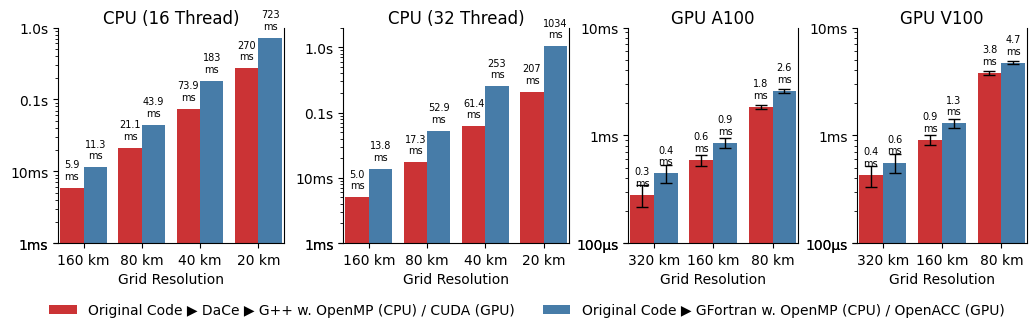

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12.5, 2.8))
gs = GridSpec(1, 4, height_ratios=[1], width_ratios=[1, 1, 0.75, 0.75], wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

plot_df = construct_performance_plot_table(daata, "fortran/cpu", ["dace/cpu", "fortran/cpu"], 16)
plot_performance(plot_df, "fortran/cpu", ["dace/cpu", "fortran/cpu"],
                 legend_mapping={
                    'dace/cpu': 'Original Code ▶ DaCe ▶ G++ w. OpenMP',
                    'fortran/cpu': 'Original Code ▶ GFortran w. OpenMP',
                 },
                 YLIM_LO=1e0, YLIM_HI=1e3,
                 ax=ax1, xlabel=False, ylabel_text="CPU (16 Thread)", annotation_unit='s')

plot_df = construct_performance_plot_table(daata, "fortran/cpu", ["dace/cpu", "fortran/cpu"], 32)
plot_performance(plot_df, "fortran/cpu", ["dace/cpu", "fortran/cpu"],
                 legend_mapping={
                    'dace/cpu': 'Original Code ▶ DaCe ▶ G++ w. OpenMP',
                    'fortran/cpu': 'Original Code ▶ GFortran w. OpenMP',
                 },
                 YLIM_LO=1e0, YLIM_HI=2e3,
                 ax=ax2, xlabel=False, ylabel_text="CPU (32 Thread)", annotation_unit='s')

plot_df = construct_performance_plot_table(daata, "fortran/gpu/a100", ["dace/gpu/a100", "fortran/gpu/a100"], 1)
plot_performance(plot_df, "fortran/gpu/a100", ["dace/gpu/a100", "fortran/gpu/a100"],
                 legend_mapping={
                    'dace/gpu/a100': 'Original Code ▶ DaCe ▶ G++ w. CUDA',
                    'fortran/gpu/a100': 'Original Code ▶ GFortran w. OpenACC',
                 },
                 YLIM_LO=0.1, YLIM_HI=10,
                 ax=ax3, xlabel=True, ylabel_text="GPU A100", annotation_unit='ms')

plot_df = construct_performance_plot_table(daata, "fortran/gpu/v100", ["dace/gpu/v100", "fortran/gpu/v100"], 1)
plot_performance(plot_df, "fortran/gpu/v100", ["dace/gpu/v100", "fortran/gpu/v100"],
                 legend_mapping={
                    'dace/gpu/v100': 'Original Code ▶ DaCe ▶ G++ w. CUDA',
                    'fortran/gpu/v100': 'Original Code ▶ GFortran w. OpenACC',
                 },
                 YLIM_LO=0.1, YLIM_HI=10,
                 ax=ax4, xlabel=True, ylabel_text="GPU V100", annotation_unit='ms')

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, ['Original Code ▶ DaCe ▶ G++ w. OpenMP (CPU) / CUDA (GPU)', 'Original Code ▶ GFortran w. OpenMP (CPU) / OpenACC (GPU)'],
           loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2), frameon=False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend().set_visible(False)

plt.tight_layout()
plt.show()

# fig.savefig('icon-16-32-gpu.pdf', bbox_inches='tight')
# files.download('icon-16-32-gpu.pdf')